In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['hatch.color']='g'
import xarray as xr
from misc.jupyter import end_interactive
from scipy.stats import ttest_1samp

from datetime import datetime, timedelta
from urllib.request import urlopen

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from metpy.units import masked_array, units
from netCDF4 import Dataset
plt.rcParams['figure.dpi'] = 300
#from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
#import geoxarray

import pandas as pd

In [2]:
land = xr.open_dataset('/tigress/tessj/data/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.LANDFRAC.085001-184912.nc')
land_mask = land.LANDFRAC.mean('time')

<xarray.DataArray 'LANDFRAC' (lat: 96, lon: 144)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

# Get dates of volcanic eruptions (from two datasets; 500-1850AD and 1850-2006)

In [3]:
forcing1 = xr.open_dataset('/tigress/wenchang/data/cesm/LME/FORCING/IVI2LoadingLatHeight501-2000_L18_c20100518.nc')
forcing2 = xr.open_dataset('/tigress/wenchang/data/cesm/LME/FORCING/CCSM4_volcanic_1850-2008_prototype1.nc')
colmass1=forcing1.colmass
colmass2=forcing2.colmass


In [4]:
'''volc_dates2 = []
for i in range(len(forcing2.date)):
    if (colmass2[i-1].sum()< 7e-6) and (colmass2[i].sum() > 7e-6):
        #print(i)
        volc_dates2.append(forcing2.date[i])'''

'volc_dates2 = []\nfor i in range(len(forcing2.date)):\n    if (colmass2[i-1].sum()< 7e-6) and (colmass2[i].sum() > 7e-6):\n        #print(i)\n        volc_dates2.append(forcing2.date[i])'

In [5]:
volc_dates1 = [ 5290415.,  5410415.,  5670415.,  5770415.,  5890415.,  6190415.,
        6640415.,  7380415.,  7440415.,  8540415.,  8700415.,  8770415.,
        8930415.,  9290415.,  9390415.,  9450415.,  9610415.,  9870415.,
       10010415., 10180415., 10300415., 10400415., 10500415., 10600415.,
       10810415., 10940415., 11100415., 11180415., 11320415., 11420415.,
       11500415., 11580415., 11760515., 11880415., 12130415., 12320415.,
       12580415., 12680415., 12750415., 12840415., 13070415., 13160415.,
       13280415., 13410415., 13580415., 13700415., 13810415., 14160415.,
       14520415., 14590415., 14740415., 15030415., 15120415., 15260415.,
       15340615., 15840415., 15930415., 16000215., 16190415., 16410115.,
       16730515., 16930615., 17110415., 17190415., 17290815., 17380815.,
       17551015., 17610915., 17940315., 18090415., 18150415., 18310415.]
      
volc_dates2 = [18531215.,18560915.,18830815.,18900215.,19020515.,19070315.,19120615.,
              19211215.,19280815.,19320415.,19530715.,19630315.,19680615.,
              19741015.,19820515.,19910615.] 

volc_dates = volc_dates1 + volc_dates2

In [6]:
'''volc_dates_all = volc_dates1 + volc_dates2
for i in range(len(volc_dates_all)):
    volc_dates_all[i] = f'{int(str(volc_dates_all[i])[:-6]):04d}'

volc_dates_all=volc_dates_all[10:]
volc_dates_all'''

"volc_dates_all = volc_dates1 + volc_dates2\nfor i in range(len(volc_dates_all)):\n    volc_dates_all[i] = f'{int(str(volc_dates_all[i])[:-6]):04d}'\n\nvolc_dates_all=volc_dates_all[10:]\nvolc_dates_all"

In [7]:
'''large_erup = pd.DataFrame.from_csv('/tigress/wenchang/analysis/LME/eruptions_855_2000_large.csv')
large_erup = large_erup.t_erupt_start.to_list()
import re 
for i in range(len(large_erup)):
    large_erup[i]= re.sub(' 00:00:00','', large_erup[i] )
    large_erup[i]= re.sub('-','', large_erup[i] )
    large_erup[i]= large_erup[i][0:4]
#    large_erup[i] = float(large_erup[i])
#    large_erup[i] = large_erup[i] + 14.
    
#large_erup
volc_dates1 = large_erup[:45]
volc_dates2 = large_erup[45:] 
st = set(volc_dates)
iv_large = [i for i, e in enumerate(volc_dates_all) if e in st]
iv_large'''

"large_erup = pd.DataFrame.from_csv('/tigress/wenchang/analysis/LME/eruptions_855_2000_large.csv')\nlarge_erup = large_erup.t_erupt_start.to_list()\nimport re \nfor i in range(len(large_erup)):\n    large_erup[i]= re.sub(' 00:00:00','', large_erup[i] )\n    large_erup[i]= re.sub('-','', large_erup[i] )\n    large_erup[i]= large_erup[i][0:4]\n#    large_erup[i] = float(large_erup[i])\n#    large_erup[i] = large_erup[i] + 14.\n    \n#large_erup\nvolc_dates1 = large_erup[:45]\nvolc_dates2 = large_erup[45:] \nst = set(volc_dates)\niv_large = [i for i, e in enumerate(volc_dates_all) if e in st]\niv_large"

In [8]:
# indices of large eruptions in volc_dates
iv_large = [0, 3, 6,
 7, 8, 9, 10, 14, 15, 21, 22, 24, 25, 26, 27, 28, 29, 32, 33, 36, 37, 38, 39, 
            44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 59, 60, 61, 64,
             65, 66, 68, 73, 76, 77]

large_dates = [volc_dates[i] for i in iv_large]

# Eruption weights and Symmetry classification

In [9]:
# 500-1849
erup_weights1=[0 for x in range(len(volc_dates1))]
erup_sym1 = [0 for x in range(len(volc_dates1))]
for i in range(len(volc_dates1)):
    ind = np.where(forcing1.date==volc_dates1[i])
    nh = 0
    sh = 0
    #print(i)
    for j in range(48):
        nh += np.average(colmass1.isel(lat=slice(32,64))[ind[0]+j],weights=np.cos(colmass1.isel(lat=slice(32,64)).lat*np.pi/180.),axis=1)
        sh += np.average(colmass1.isel(lat=slice(0,32))[ind[0]+j],weights=np.cos(colmass1.isel(lat=slice(0,32)).lat*np.pi/180.),axis=1)
        erup_weights1[i] += np.average(colmass1[ind[0]+j], weights=np.cos(colmass1.lat*np.pi/180.),axis=1)
    erup_sym1[i] = [nh-sh,nh+sh]
erup_weights1 = np.log(np.squeeze(erup_weights1))
    

In [10]:
# 1850-2006
erup_weights2=[0 for x in range(len(volc_dates2))]
erup_sym2 = [0 for x in range(len(volc_dates2))]
for i in range(len(volc_dates2)):
    ind = np.where(forcing2.date==volc_dates2[i])
    nh = 0
    sh = 0
    #print(i)
    for j in range(48):
        nh += np.average(colmass2.isel(lat=slice(32,64))[ind[0]+j],weights=np.cos(colmass2.isel(lat=slice(32,64)).lat*np.pi/180.),axis=1)
        sh += np.average(colmass2.isel(lat=slice(0,32))[ind[0]+j],weights=np.cos(colmass2.isel(lat=slice(0,32)).lat*np.pi/180.),axis=1)
        erup_weights2[i] += np.average(colmass2[ind[0]+j], weights=np.cos(colmass2.lat*np.pi/280.),axis=1)
    erup_sym2[i] = [nh-sh,nh+sh]
erup_weights2 = np.log(np.squeeze(erup_weights2))

In [11]:
# add the two periods

erup_weights = erup_weights1.tolist() + erup_weights2.tolist()
erup_sym = erup_sym1 + erup_sym2


In [12]:
# turn 2D symmetry array into symmetry angle; use threshold of +/- pi/6 
erup_sym_angle = [0 for x in range(len(erup_sym))]
erup_sym_bool = [0 for x in range(len(erup_sym))]
for i in range(len(erup_sym)):
    erup_sym_angle[i] = np.arctan2(erup_sym[i][0][0],erup_sym[i][1][0])
    if erup_sym_angle[i] > np.pi/6.:
        erup_sym_bool[i] = 1 
    if erup_sym_angle[i] < -np.pi/6.:
         erup_sym_bool[i] = -1

In [13]:
# then add constant so that Pinatubo has a value of ~-3.5 so that it reflects radiative forcing
const=3.5-erup_weights[-1]
erup_weights=[x + const for x in erup_weights]

In [14]:
erup_weights = [4.198237317545125, 4.11317437628273, 2.5833139325809586, 3.732058245107523, 0.9924984136303561, 2.79283115288076, 3.4265538889861054, 3.9984521796451284, 2.8321465786886524, 3.2482627838000946, 3.242621426160893, 1.4495030197677465, 1.0393538974801952, 2.4835817008137973, 0.6236851082082655, 1.442270278426033, 2.9588215298379668, 2.1065409758468814, 3.2157890567837715, 1.9514104983161449, 2.1480671344023072, 1.0188180677312104, 1.3873616495790415, 0.9394558936035153, 3.019479757401429, 1.966749958244412, 1.5307012012069947, 1.4086387222775638, 1.069355587054586, 0.16409038126405662, 1.1127360560506396, 3.4716583296523247, 3.8186015443521972, 1.6882203841000134, 4.266144752999342, 2.9932089911743276, 5.7239010261335785, 3.1021600383979537, 4.483634329276291, 4.224648497538364, 0.5268338705386917, 0.9656359096635967, 2.9761685099574056, 3.7422597001664046, 0.4474966033595944, 1.6331256003960135, 2.0233506825058853, 2.442551521896249, 5.180288997849326, 3.0820366141048634, 2.9221753604930907, 0.5378743211690828, 1.440113250588773, 1.2596762437388502, 1.7063160175549097, 3.181902636669732, 2.616813442693976, 4.11168889913466, 2.0157316569862562, 4.0806252375111605, 3.011310693331951, 3.6551824862841533, 1.7119872778761316, 3.445537421341607, 2.4934618458805, 1.5596875694082168, 2.0827590152349362, 4.532320699397075, 2.181273220676223, 4.177328531336492, 4.882304759994825, 3.097861029411047, 1.7222165894144066, 0.8741522795533356, 3.707315193119152, 3.0385066922712225, 3.495901112130311, 0.9218316417593364, 2.1720797374364267, 0.829325220613498, 1.9447801042363242, 1.0348675509224456, 0.2277647716490847, 3.1483197288649905, 1.6290306207867928, 1.6281306076900162, 2.995415406861043, 3.500000000000001]

In [15]:
erup_sym_bool = [1, -1, 1, -1, 1, 1, 0, 0, 0, 0, 0, 1, 1, -1, -1, -1, 0, 1, 0, 1, -1, 1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 0, -1, 0, 0, -1, -1, 1, 0, -1, 1, -1, 0, 0, 1, 0, 1, 1, 1, -1, 1, -1, 0, -1, 0, 0, -1, -1, 1, 1, -1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, -1, 0, -1, 1, 0, 0, 0, 0, 0]

# LME precip for the 13 full-forcing ensemble members are only available split into convective (PRECC) & large-scale precip (PRECL), have to add them together into PRECT

In [13]:
'''# CONVECTIVE PRECIP - get 13 LME ensembles
preccs = [0 for x in range(13)]
precc_1mil = '/tigress/gvecchi/DATA/CESM/LME/PRECC/b.e11.BLMTRC5CN.f19_g16.0{:02d}.cam.h0.PRECC.085001-184912.nc'
precc_2mil = '/tigress/gvecchi/DATA/CESM/LME/PRECC/b.e11.BLMTRC5CN.f19_g16.0{:02d}.cam.h0.PRECC.185001-200512.nc'

for i in range(1,13):
    preccs[i-1] = xr.open_mfdataset([precc_1mil.format(i),precc_2mil.format(i)])

preccs[12] = xr.open_mfdataset(['/tigress/gvecchi/DATA/CESM/LME/PRECC/b.e11.BLMTRC5CN.f19_g16.013.cam.h0.PRECC.085001-184912.nc','/tigress/gvecchi/DATA/CESM/LME/PRECC/b.e11.BLMTRC5CN.f19_g16.013.cam.h0.PRECC.185001-200512.nc'])

# LARGE-SCALE PRECIP - get 13 LME ensembles
precls = [0 for x in range(13)]
precl_1mil = '/tigress/wenchang/data/cesm/LME/PRECL/b.e11.BLMTRC5CN.f19_g16.0{:02d}.cam.h0.PRECL.085001-184912.nc'
precl_2mil = '/tigress/wenchang/data/cesm/LME/PRECL/b.e11.BLMTRC5CN.f19_g16.0{:02d}.cam.h0.PRECL.185001-200512.nc'
                                                   

for i in range(1,13):
    precls[i-1] = xr.open_mfdataset([precl_1mil.format(i),precl_2mil.format(i)])

precls[12] = xr.open_mfdataset(['/tigress/wenchang/data/cesm/LME/PRECL/b.e11.BLMTRC5CN.f19_g16.013.cam.h0.PRECL.085001-184912.nc','/tigress/wenchang/data/cesm/LME/PRECL/b.e11.BLMTRC5CN.f19_g16.013.cam.h0.PRECL.185001-200512.nc'])

# create PRECT list of datasets
PRECT = [0 for x in range(13)]
for i in range(13):
    PRECT[i] = precls[i].PRECL + preccs[i].PRECC
    PRECT[i] = PRECT[i] * 8.64e+7
    
# this is practice selecting time slices from xarray datasets
year = 870
month=3
PRECT[0].sel(time=slice(f'{year-5:04d}-{month:02d}', f'{year+5:04d}'))
'''

In [16]:
# only keep eruption dates after 855AD
volc_dates = [int(d - 14) for d in volc_dates if d>8550101]
erup_sym_bool=erup_sym_bool[10:]
erup_weights=erup_weights[10:]
erup_sym_angle=erup_sym_angle[10:]

In [17]:
year=[]
month=[]
volc_dates_large = [volc_dates[i] for i in iv_large]  
for date in volc_dates_large:
    s = str(date)
    #print(s)
    year.append(int(s[0:-4]))
    month.append(int(s[-4:-2]))
    #print(date,year,month)

In [19]:
#run this only when u need to recreate "daa" array of selected precip data
'''erup_precip = [0 for x in range(len(volc_dates))]
da = [0 for x in range(13)]
mytime = pd.date_range('1990-01', end='2000-12', freq='MS')
for j in range(13):
    for i in range(len(volc_dates)):
        #ind = np.where(volc_dates[i]==preccs[j].date)[0][0] - 60 #find index 5 years before eruption
        erup_precip[i] = PRECT[j].sel(time=slice(f'{year[i]-5:04d}', f'{year[i]+5:04d}')).assign_coords(time=mytime)
    da[j] = xr.concat(erup_precip, dim=pd.Index(range(len(volc_dates)), name='iv'))
    print(j)
daa = xr.concat(da,dim=pd.Index(range(13),name='en'))
daa.to_dataset(name='lme_precip').to_netcdf('/tigress/tessj/lme_precip.nc')
'''
#daa.load()

"erup_precip = [0 for x in range(len(volc_dates))]\nda = [0 for x in range(13)]\nmytime = pd.date_range('1990-01', end='2000-12', freq='MS')\nfor j in range(13):\n    for i in range(len(volc_dates)):\n        #ind = np.where(volc_dates[i]==preccs[j].date)[0][0] - 60 #find index 5 years before eruption\n        erup_precip[i] = PRECT[j].sel(time=slice(f'{year[i]-5:04d}', f'{year[i]+5:04d}')).assign_coords(time=mytime)\n    da[j] = xr.concat(erup_precip, dim=pd.Index(range(len(volc_dates)), name='iv'))\n    print(j)\ndaa = xr.concat(da,dim=pd.Index(range(13),name='en'))\ndaa.to_dataset(name='lme_precip').to_netcdf('/tigress/tessj/lme_precip.nc')\n"

In [18]:
# warning - its 7.4gb
da = xr.open_dataset('/tigress/tessj/lme_precip.nc')

In [19]:
da

<xarray.Dataset>
Dimensions:     (en: 13, iv: 78, lat: 96, lon: 144, time: 132)
Coordinates:
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time        (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
  * iv          (iv) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * en          (en) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lme_precip  (en, iv, time, lat, lon) float32 ...

In [20]:
#make list of control climatology in the sahel (first 4 years of selected data for each eruption)
ctl_sahel = []
for i in range(len(da.iv)):
    print(i)
    ctl_sahel.append(da.isel(time=slice(0,60),iv=i,lon=(da.lon<=10)|(da.lon>=340)).sel(lat=slice(10,20)).where(land_mask>0.9).mean(['lon','lat','en']).groupby('time.month').mean('time').load())

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


In [21]:
empty = ctl_sahel[0]-ctl_sahel[0]
for pr in ctl_sahel:
    empty += pr

mean_ctl = empty/len(ctl_sahel)

<xarray.Dataset>
Dimensions:     (month: 12)
Coordinates:
  * month       (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lme_precip  (month) float32 0.027744306 0.0226968 ... 1.7114266 0.20083767

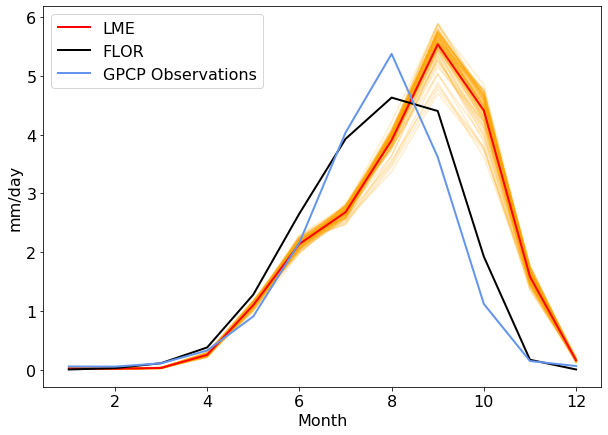

In [22]:
# take a closer look at that SNOUT (control precipitation climatology for each of the 78 eruptions)
flor_ctl = xr.open_dataarray('/tigress/tessj/flor_ctl_clim.nc')
gpcp = xr.open_dataarray('/tigress/tessj/data/gpcp_sahel_clim.nc')
plt.figure(figsize=(10,7))
for pr in ctl_sahel: pr.lme_precip.plot(color='orange',alpha = 0.2)
#ctl_sahel.mean.lme_precip.plot(linewidth=2)
mean_ctl.lme_precip.plot(label='LME', color ='r',linewidth=2)
flor_ctl.plot(label='FLOR',linewidth=2,color='k')
gpcp.plot(label='GPCP Observations',linewidth=2,color='cornflowerblue')
#plt.title('Control Precipitation Climatologies in the Sahel',fontsize=20)
plt.ylabel('mm/day',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=2,fontsize=16)
#plt.savefig('ctl_clim.png')

In [23]:
empty_stdv = []
for pr in ctl_sahel:
    empty_stdv.append(pr.lme_precip.sel(month=slice(6,10)).mean('month').values.item())

import statistics
ctl_stdev = statistics.stdev(empty_stdv)

In [206]:
daa

<xarray.Dataset>
Dimensions:     (en: 13, iv: 78, lat: 6, lon: 13, time: 132)
Coordinates:
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * en          (en) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * lat         (lat) float64 10.42 12.32 14.21 16.11 18.0 19.89
  * iv          (iv) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * time        (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
    month       (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    lme_precip  (en, iv, time, lat, lon) float32 -0.022242364 ... -0.19933571

In [24]:
#daa = anomaly dataset (subtract out ctl climatologies)

daa = da.isel(lon=(da.lon<=10)|(da.lon>=340)).sel(lat=slice(10,20)).where(land_mask>0.9).groupby('time.month') - da.isel(time=slice(0,60),lon=(da.lon<=10)|(da.lon>=340)).sel(lat=slice(10,20)).where(land_mask>0.9).mean(['lon','lat','en']).groupby('time.month').mean('time')


In [129]:
# can we take years 1-4 for eruptions before june and years 2-5 for eruptions after june? here we try it
for i in range(len(daa.iv)):
    if month[i] < 6:
        print(month[i])

4
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
4
1
5
4
4
4
4
4
2
5
3
5


In [25]:
#shorten to just large datasets 
daa = daa.sel(iv=iv_large)
erup_sym_bool_large = [erup_sym_bool[i] for i in iv_large]
erup_weights_large = [erup_weights[i] for i in iv_large]
erup_sym_angle_large = [erup_sym_angle[i] for i in iv_large]

In [26]:
len(erup_sym_bool_large)

46

In [27]:
erup_sym_str_large = []
for i in range(len(erup_sym_bool_large)):
    if erup_sym_bool_large[i]>0:
        erup_sym_str_large.append('NH')
    if erup_sym_bool_large[i]==0:
        erup_sym_str_large.append('Sym')
    if erup_sym_bool_large[i]<0:
        erup_sym_str_large.append('SH')


In [28]:
df_large = pd.DataFrame(list(zip(year,iv_large,month, erup_sym_str_large, erup_sym_angle_large, erup_weights_large)), 
               columns =['Year','Volcanic Index','Month', 'Symmetry', 'Symmetry Angle','Forcing (W/m$^2$)']) 
df_large

,Year,Volcanic Index,Month,Symmetry,Symmetry Angle,Forcing (W/m$^2$)
0,870,0,4,Sym,0.252077,3.242621
1,929,3,4,SH,-0.600884,2.483582
2,961,6,4,Sym,-0.323642,2.958822
3,987,7,4,NH,0.773111,2.106541
4,1001,8,4,Sym,0.097128,3.215789
5,1018,9,4,NH,0.772971,1.951410
6,1030,10,4,SH,-0.600884,2.148067
7,1081,14,4,Sym,0.431969,3.019480
8,1094,15,4,SH,-0.600884,1.966750
9,1158,21,4,SH,-0.598103,3.471658


In [29]:
nh_precip=[]
sh_precip=[]
sym_precip=[]

for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
            nh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en'])* (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] == 0:
        sym_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] < 0:
        sh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))
#daa.sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','en']).groupby('time.month').mean(['time']).lme_precip.plot()



In [169]:
'''nh_precip=[]
sh_precip=[]
sym_precip=[]

for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
        if month[i] < 6:
            nh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en'])* (1.0/erup_weights_large[i]))
        else:
            nh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{11:02d}', f'{1999}-{11:02d}')).mean(['lat','lon','en'])* (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] == 0:
        if month[i]<6:
            sym_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))
        else:
            sym_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{11:02d}', f'{1999}-{11:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] < 0:
        if month[i] < 6:
            sh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))
        else:
            sh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{11:02d}', f'{1999}-{11:02d}')).mean(['lat','lon','en']) * (1.0/erup_weights_large[i]))

#daa.sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','en']).groupby('time.month').mean(['time']).lme_precip.plot()
'''

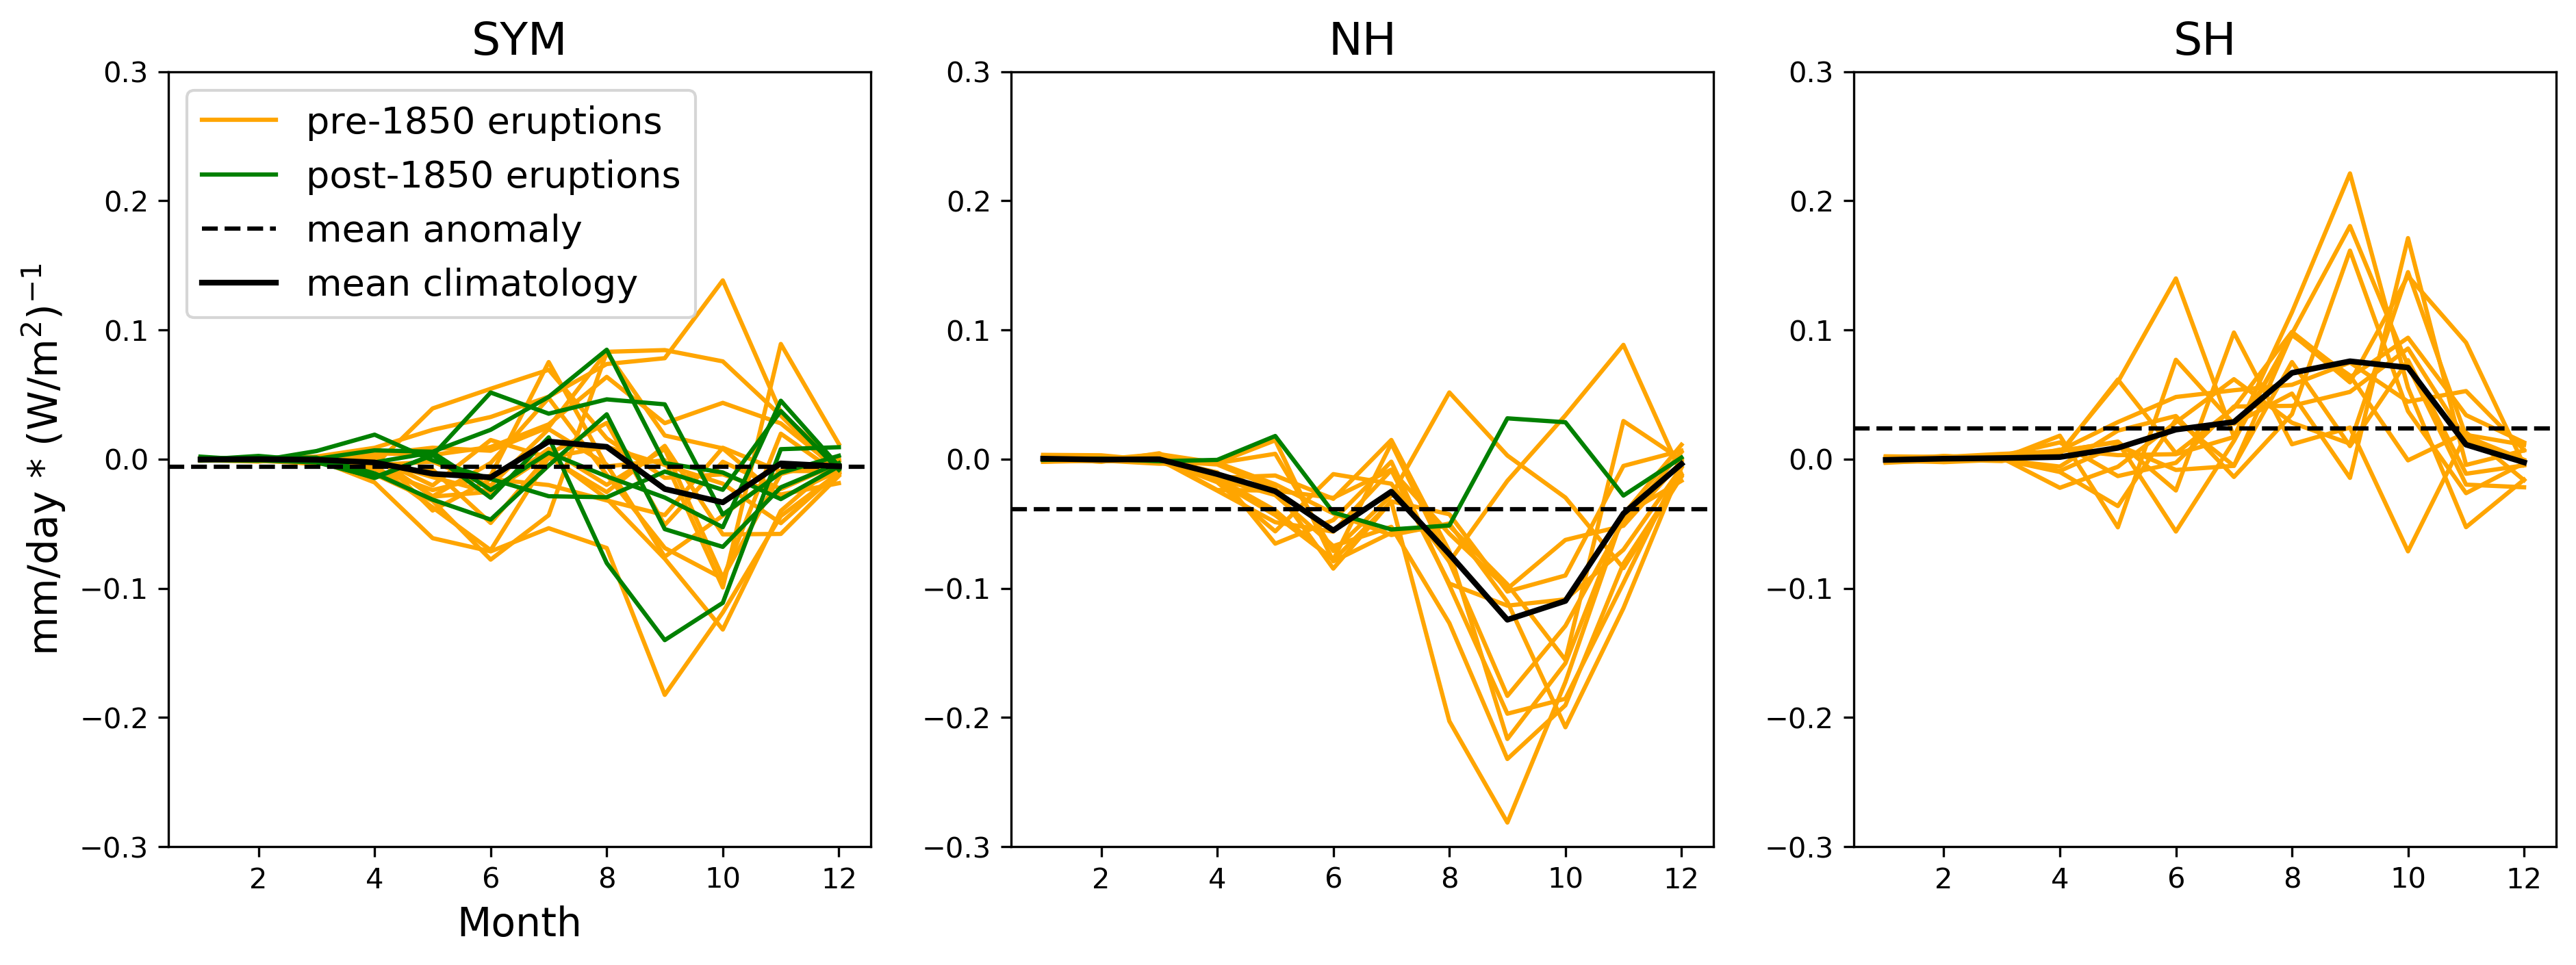

In [32]:
# as 3 subfigures 

plt.figure(figsize=(15,5))

ax1=plt.subplot(1,3,2)
mean=0

avg_clim=nh_precip[0].groupby('time.month').mean('time').lme_precip - nh_precip[0].groupby('time.month').mean('time').lme_precip
for pr in nh_precip: 
    if pr.iv > 62: 
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(nh_precip)
avg_clim = avg_clim/len(nh_precip)
ax1.axhline(y=mean, color='k', linestyle="--",label='mean anomaly')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
ax1.set_title('NH',fontsize=16)
plt.ylim(-0.3,.3)
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2=plt.subplot(1,3,3)
mean=0
avg_clim=sh_precip[0].groupby('time.month').mean('time').lme_precip - sh_precip[0].groupby('time.month').mean('time').lme_precip
for pr in sh_precip: 
    if pr.iv > 62:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(sh_precip)
avg_clim = avg_clim/len(sh_precip)
plt.axhline(y=mean, color='k', linestyle="--",label='mean anomaly (0.022)')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.ylim(-0.3,.3)
plt.title('SH',fontsize=16)
plt.ylabel('')
plt.xlabel('')

ax3=plt.subplot(1,3,1)
mean=0
ii=1
iii=1
avg_clim=sym_precip[0].groupby('time.month').mean('time').lme_precip - sym_precip[0].groupby('time.month').mean('time').lme_precip
for pr in sym_precip: 
    if pr.iv > 62:
        if ii==1:
            pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g',label='post-1850 eruptions')
            ii=0
        else:
            pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        if iii==1:
            pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange',label='pre-1850 eruptions')
            iii=0
        else:
            pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(sym_precip)
avg_clim = avg_clim/len(sym_precip)
plt.axhline(y=mean, color='k', linestyle="--",label='mean anomaly')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('SYM', fontsize=16)
plt.ylim(-0.3,.3)
plt.ylabel('')
ax3.set_ylabel('mm/day * (W/m$^2$)$^{-1}$',fontsize=14)
ax3.set_xlabel('Month',fontsize=14)

ax3.legend(loc=2,fontsize=13)


#plt.savefig('lme_eruptions_norm.png',bbox_inches='tight')


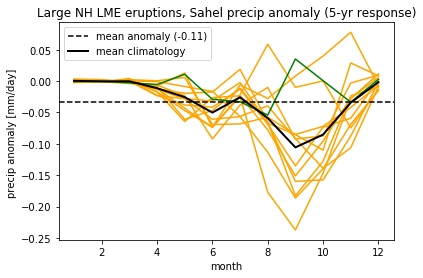

In [55]:
mean=0
avg_clim=nh_precip[0].groupby('time.month').mean('time').lme_precip - nh_precip[0].groupby('time.month').mean('time').lme_precip
for pr in nh_precip: 
    if pr.iv > 62: 
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(nh_precip)
avg_clim = avg_clim/len(nh_precip)
plt.axhline(y=mean, color='k', linestyle="--",label='mean anomaly (-0.11)')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large NH LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly [mm/day] ')
mean
plt.legend(loc=2)
#plt.savefig('nh_precip_large.png')
#outliers - 1912, 1729, iv 7 or 57??

In [34]:
for x in sh_precip:
    print(x.groupby('time.month').mean('time').sel(month=10).lme_precip)

<xarray.DataArray 'lme_precip' ()>
array(0.182634, dtype=float32)
Coordinates:
    iv       int64 3
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.027481, dtype=float32)
Coordinates:
    iv       int64 10
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.046119, dtype=float32)
Coordinates:
    iv       int64 15
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.174276, dtype=float32)
Coordinates:
    iv       int64 21
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.080299, dtype=float32)
Coordinates:
    iv       int64 25
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.298779, dtype=float32)
Coordinates:
    iv       int64 27
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.101758, dtype=float32)
Coordinates:
    iv       int64 36
    month    int64 10
<xarray.DataArray 'lme_precip' ()>
array(0.131122, dtype=float32)
Coordinates:
    iv       int64 44
    month    int64 10
<xarray.DataArray

In [32]:
nh_precip[0].groupby('time.month').mean('time').sel(month=8)

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    iv          int64 7
    month       int64 8
Data variables:
    lme_precip  float32 -0.032545645

In [32]:
nh_precip[0].groupby('time.month').mean('time').lme_precip - nh_precip[0].groupby('time.month').mean('time').lme_precip

<xarray.DataArray 'lme_precip' (month: 12)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
Coordinates:
    iv       int64 1
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

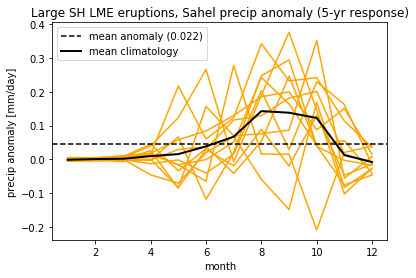

In [37]:
mean=0
avg_clim=sh_precip[0].groupby('time.month').mean('time').lme_precip - sh_precip[0].groupby('time.month').mean('time').lme_precip
for pr in sh_precip: 
    if pr.iv > 62:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(sh_precip)
avg_clim = avg_clim/len(sh_precip)
plt.axhline(y=mean, color='k', linestyle="--",label='mean anomaly (0.022)')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large SH LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly [mm/day]')
mean
plt.legend()
#plt.savefig('sh_precip_large.png')

In [250]:
mean

<xarray.DataArray 'lme_precip' ()>
array(0.02211)
Coordinates:
    iv       int64 3

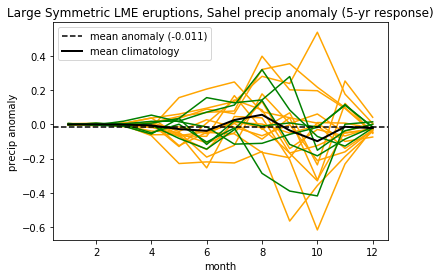

In [36]:
mean=0
avg_clim=sym_precip[0].groupby('time.month').mean('time').lme_precip - sym_precip[0].groupby('time.month').mean('time').lme_precip
for pr in sym_precip: 
    if pr.iv > 62:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'g')
    else:
        pr.groupby('time.month').mean('time').lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean('time').lme_precip
mean = mean/len(sym_precip)
avg_clim = avg_clim/len(sym_precip)
plt.axhline(y=mean, color='k', linestyle="--",label='mean anomaly (-0.011)')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large Symmetric LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly')
mean
plt.legend()
#plt.savefig('sym_precip_large.png')

In [256]:
mean

<xarray.DataArray 'lme_precip' ()>
array(-0.010949)
Coordinates:
    iv       int64 0

In [97]:
erup_weights[72]

0.2277647716490847

In [35]:
daa

<xarray.Dataset>
Dimensions:     (en: 13, iv: 46, lat: 6, lon: 13, time: 132)
Coordinates:
  * lat         (lat) float64 10.42 12.32 14.21 16.11 18.0 19.89
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * iv          (iv) int64 0 3 6 7 8 9 10 14 15 ... 60 61 64 65 66 68 73 76 77
  * en          (en) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time        (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
    month       (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    lme_precip  (en, iv, time, lat, lon) float32 -0.027415793 ... -0.22591491

In [38]:
daa.sel(iv=[0,77]).mean(['lat','lon','en']).lme_precip * (1.0/0.2277647716490847)

<xarray.DataArray 'lme_precip' (iv: 2, time: 132)>
array([[-3.230067e-02, -2.209677e-02,  4.810419e-05, ..., -2.890139e+00,
        -1.776007e-01, -4.546395e-02],
       [-9.224507e-03, -3.378767e-03, -1.804110e-02, ...,  1.085209e+00,
         1.190209e+00, -4.286342e-02]], dtype=float32)
Coordinates:
  * iv       (iv) int64 0 77
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

# violinplot time

/home/tessj/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


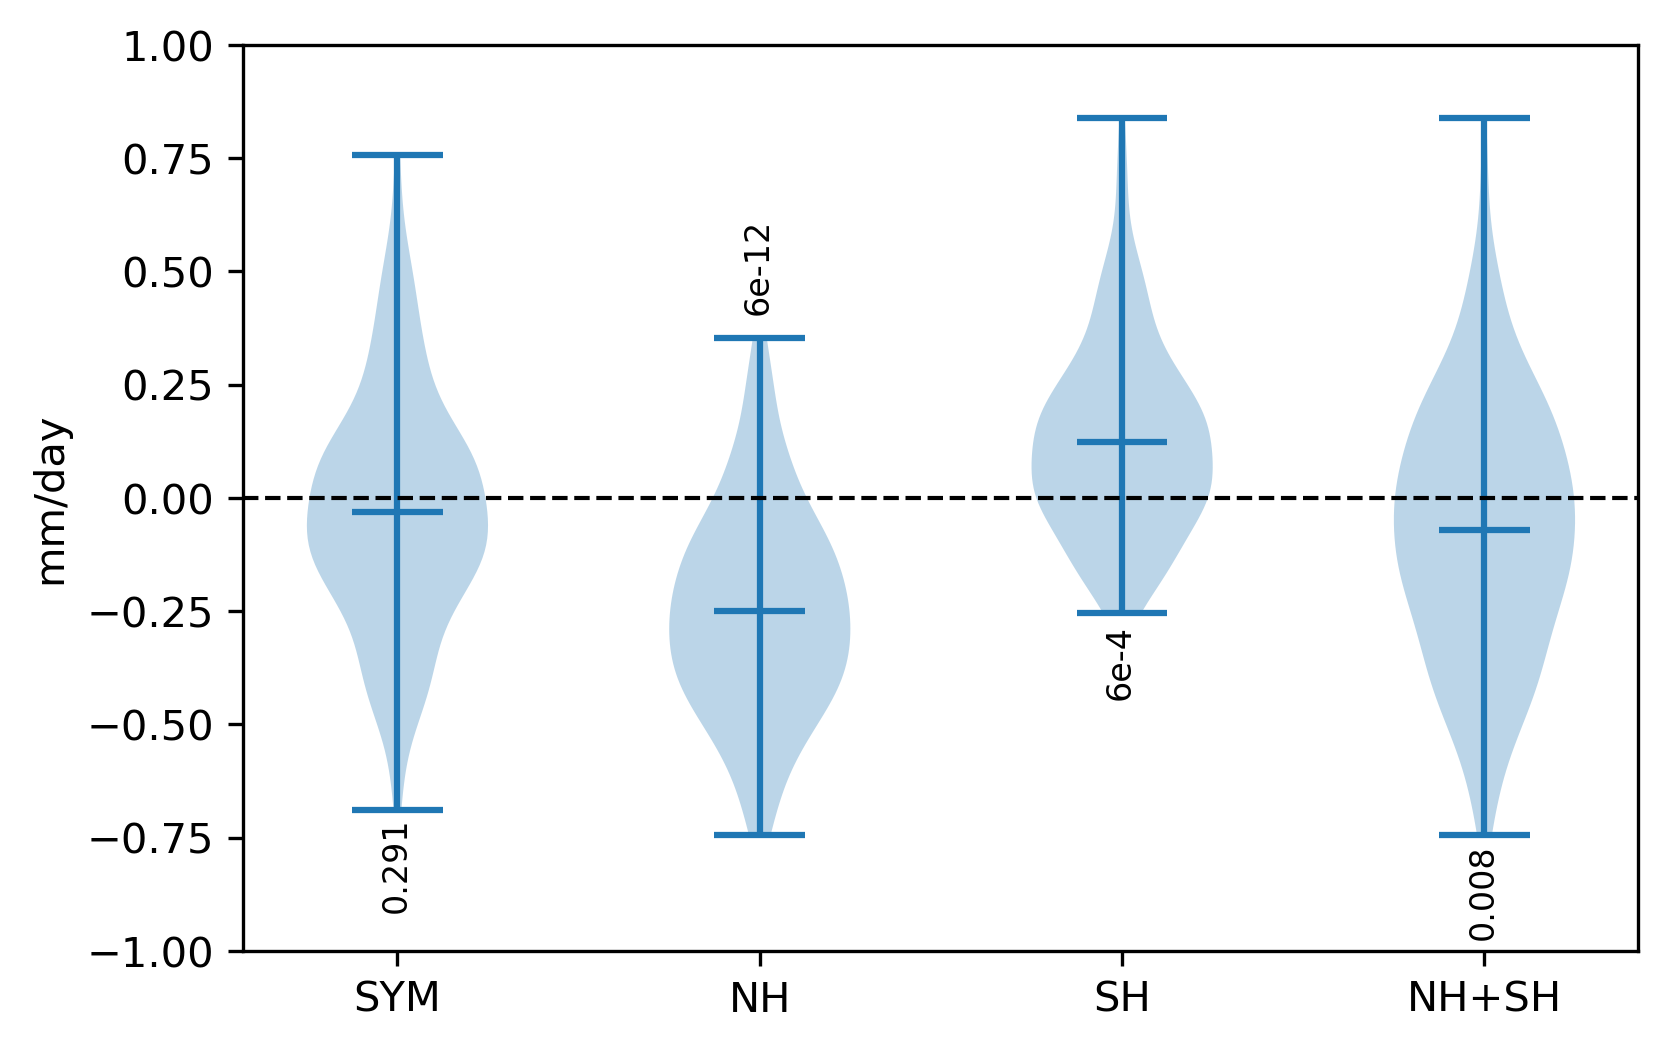

In [62]:
nh_i = []
sh_i = []
sym_i = []
nhsh_i = []
for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
        nh_i.append(i)
        nhsh_i.append(i)
    if erup_sym_bool_large[i] == 0:
        sym_i.append(i)
    if erup_sym_bool_large[i] < 0:
        sh_i.append(i)
        nhsh_i.append(i)
        
sh_precip_mean = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon']) # * (1.0/erup_weights_large[i]))
nh_precip_mean = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon']) #* (1.0/erup_weights_large[i]))
nhsh_precip_mean = daa.isel(iv=nhsh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon'])
sym_precip_mean = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon']) # * (1.0/erup_weights_large[i]))

plt.violinplot([sym_precip_mean.stack(z = ('iv','en')).lme_precip,nh_precip_mean.stack(z = ('iv','en')).lme_precip,sh_precip_mean.stack(z = ('iv','en')).lme_precip,nhsh_precip_mean.stack(z = ('iv','en')).lme_precip],showmeans=True)
plt.text(1.95,0.42,'6e-12',rotation=90,fontsize=8)
plt.text(2.95,-0.43,'6e-4',rotation=90,fontsize=8)
plt.text(.95,-.9,'0.291',rotation=90,fontsize=8)
plt.text(3.95,-.96,'0.008',rotation=90,fontsize=8)
plt.xticks([1,2,3,4], ['SYM','NH','SH','NH+SH'])
plt.ylim((-1,1))
plt.axhline(y=0, color='k', linestyle='--',lw=1)
plt.ylabel('mm/day')
#plt.title('Spread over eruptions & ensemble members, CESM-LME')
#plt.savefig('violin_lme.png',bbox_inches='tight')

In [38]:
NH_MS_mean = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon','en','iv']).lme_precip.item()
SH_MS_mean = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon','en','iv']).lme_precip.item()
SYM_MS_mean = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon','en','iv']).lme_precip.item()
NHSH_MS_mean = daa.isel(iv=nhsh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon','en','iv']).lme_precip.item()


In [35]:
daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{11:02d}', f'{1999}-{11:02d}')).groupby('time.month').mean(['time']).sel(month=slice(6,10)).mean('month').mean(['lat','lon','en','iv']).lme_precip.item()

0.0359305813908577

In [36]:
SH_MS_mean

0.12421347945928574

In [39]:
import scipy.stats

se_nh = ctl_stdev/np.sqrt(len(nh_i))
se_sh = ctl_stdev/np.sqrt(len(sh_i))
se_sym = ctl_stdev/np.sqrt(len(sym_i))
se_nhsh =ctl_stdev/np.sqrt(len(nhsh_i))

scipy.stats.norm.cdf(SYM_MS_mean,0,se_sym)*2

0.29146833430330543

In [120]:
scipy.stats.norm.sf(0.10245239,0,0.17694234/np.sqrt(30))

0.0007585317241323586

In [48]:
scipy.stats.norm.cdf(NHSH_MS_mean,0,se_nhsh)*2

0.008376279914603183

Text(0.5, 1.0, 'Spread over ensembles')

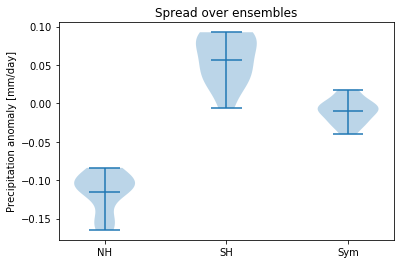

In [20]:
nh_i = []
sh_i = []
sym_i = []
for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
        nh_i.append(i)
    if erup_sym_bool_large[i] == 0:
        sym_i.append(i)
    if erup_sym_bool_large[i] < 0:
        sh_i.append(i)
        
nh_precip_mean = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','iv']) #* (1.0/erup_weights_large[i]))
sym_precip_mean = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','iv']) # * (1.0/erup_weights_large[i]))
sh_precip_mean = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','iv']) # * (1.0/erup_weights_large[i]))

plt.violinplot([nh_precip_mean.lme_precip,sh_precip_mean.lme_precip,sym_precip_mean.lme_precip],showmeans=True)
plt.xticks([1,2,3], ['NH','SH','Sym'])
plt.ylabel('Precipitation anomaly [mm/day]')
plt.title('Spread over ensembles')
#plt.savefig('violin_en.png')

Text(0.5, 1.0, 'Spread over eruptions')

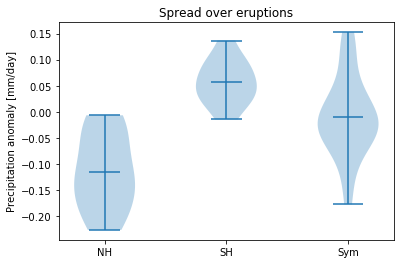

In [19]:
nh_i = []
sh_i = []
sym_i = []
for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
        nh_i.append(i)
    if erup_sym_bool_large[i] == 0:
        sym_i.append(i)
    if erup_sym_bool_large[i] < 0:
        sh_i.append(i)
        
nh_precip_mean = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','en']) #* (1.0/erup_weights_large[i]))
sym_precip_mean = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','en']) # * (1.0/erup_weights_large[i]))
sh_precip_mean = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','time','en']) # * (1.0/erup_weights_large[i]))

plt.violinplot([nh_precip_mean.lme_precip,sh_precip_mean.lme_precip,sym_precip_mean.lme_precip],showmeans=True)
plt.xticks([1,2,3], ['NH','SH','Sym'])
plt.ylabel('Precipitation anomaly [mm/day]')
plt.title('Spread over eruptions')
#plt.savefig('violin_iv.png')

# With ensemble spread

In [36]:
nh_precip=[]
sh_precip=[]
sym_precip=[]

for i in range(len(daa.iv)):
    if erup_sym_bool_large[i] > 0:
        nh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']))#* (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] == 0:
        sym_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']))# * (1.0/erup_weights_large[i]))
    if erup_sym_bool_large[i] < 0:
        sh_precip.append(daa.isel(iv=i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']))# * (1.0/erup_weights_large[i]))
#daa.sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon','en']).groupby('time.month').mean(['time']).lme_precip.plot()



In [ ]:
mean=0
avg_clim=nh_precip[0].groupby('time.month').mean(['time','en']).lme_precip - nh_precip[0].groupby('time.month').mean(['time','en']).lme_precip
for pr in nh_precip: 
    if pr.iv > 62: 
        plt.fill_between(nh_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='green', alpha=0.05)
        
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'g')
    else:
        plt.fill_between(nh_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='orange', alpha=0.05)
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'r')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean(['time','en']).lme_precip
mean = mean/len(nh_precip)
avg_clim = avg_clim/len(nh_precip)
plt.axhline(y=mean, color='k', linestyle="--",label=f'mean anomaly ({mean.item(0)})')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large NH LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly [mm/day] ')
mean
plt.legend(loc=2)
#plt.savefig('nh_precip_large_spread.png')
#outliers - 1912, 1729, iv 7 or 57??

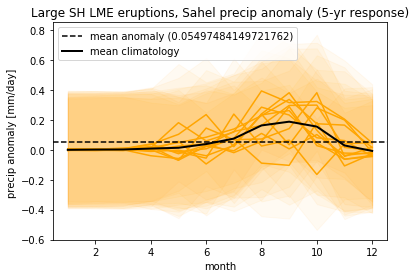

In [55]:
mean=0
avg_clim=sh_precip[0].groupby('time.month').mean(['time','en']).lme_precip - sh_precip[0].groupby('time.month').mean(['time','en']).lme_precip
for pr in sh_precip: 
    if pr.iv > 62: 
        plt.fill_between(nh_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='green', alpha=0.05)
        
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'g')
    else:
        plt.fill_between(nh_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='orange', alpha=0.05)
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean(['time','en']).lme_precip
mean = mean/len(sh_precip)
avg_clim = avg_clim/len(sh_precip)
plt.axhline(y=mean, color='k', linestyle="--",label=f'mean anomaly ({mean.item(0)})')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large SH LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly [mm/day] ')
mean
plt.legend(loc=2)
#plt.savefig('sh_precip_large_spread.png')


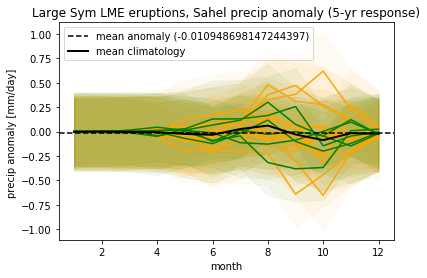

In [56]:
mean=0
avg_clim=sym_precip[0].groupby('time.month').mean(['time','en']).lme_precip - sym_precip[0].groupby('time.month').mean(['time','en']).lme_precip
for pr in sym_precip: 
    if pr.iv > 62: 
        plt.fill_between(sym_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='green', alpha=0.05)
        
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'g')
    else:
        plt.fill_between(sym_precip[0].groupby('time.month').mean(['time','en']).month,
        pr.groupby('time.month').mean(['time','en']).lme_precip - pr.groupby('time.month').std('en').mean('time').lme_precip,
        pr.groupby('time.month').mean(['time','en']).lme_precip + pr.groupby('time.month').std('en').mean('time').lme_precip,
        color='orange', alpha=0.05)
        pr.groupby('time.month').mean(['time','en']).lme_precip.plot(color = 'orange')
    mean+= pr.lme_precip.mean()
    avg_clim+=pr.groupby('time.month').mean(['time','en']).lme_precip
mean = mean/len(sym_precip)
avg_clim = avg_clim/len(sym_precip)
plt.axhline(y=mean, color='k', linestyle="--",label=f'mean anomaly ({mean.item(0)})')
avg_clim.plot(color='k',linewidth=2,label='mean climatology')
plt.title('Large Sym LME eruptions, Sahel precip anomaly (5-yr response)')
plt.ylabel('precip anomaly [mm/day] ')
mean
plt.legend(loc=2)
#plt.savefig('sym_precip_large_spread.png')
#outliers - 1912, 1729, iv 7 or 57??

# 95% confidence interval

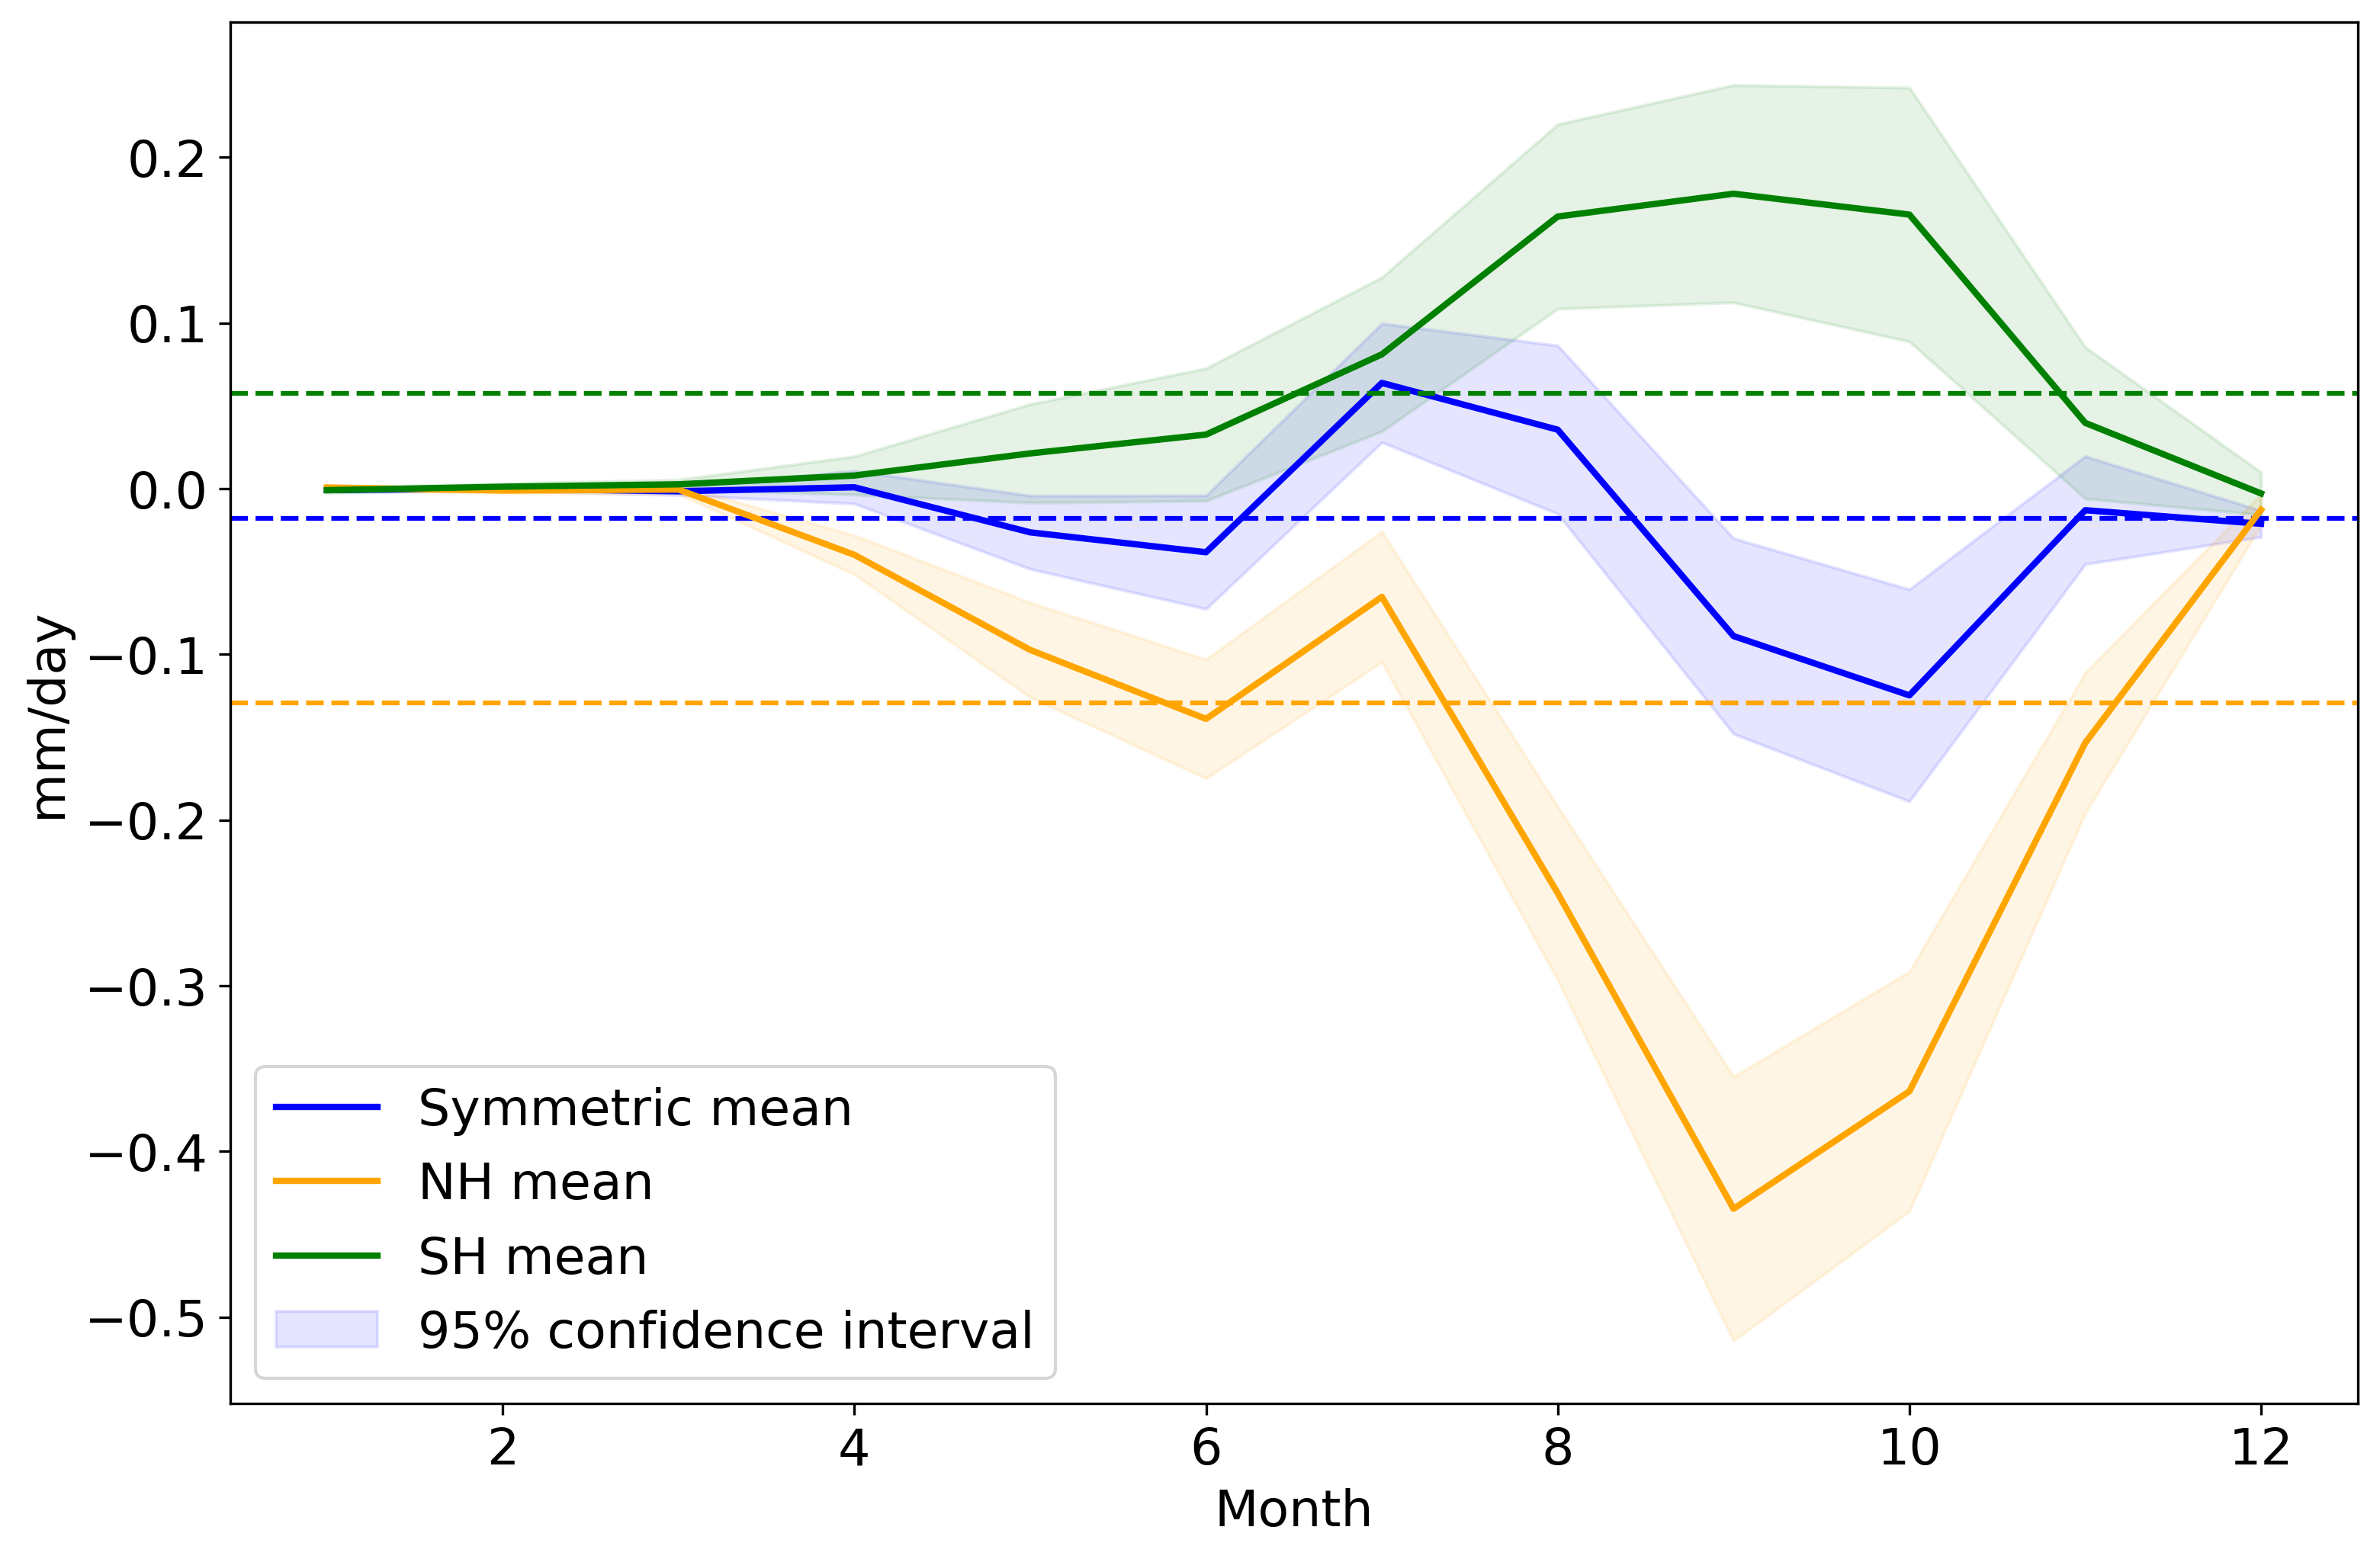

In [38]:
nh_precip=[]
sh_precip=[]
sym_precip=[]

nh_precip = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']) #* (1.0/erup_weights_large[i]))
sym_precip = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']) # * (1.0/erup_weights_large[i]))
sh_precip = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{1999}-{month[i]:02d}')).mean(['lat','lon']) # * (1.0/erup_weights_large[i]))


Z = 1.960 #z-test
n_nh = len(nh_precip.en) * len(nh_precip.iv) #sample size
n_sh = len(sh_precip.en) * len(sh_precip.iv) #sample size
n_sym = len(sym_precip.en) * len(sym_precip.iv) #sample size

plt.figure(figsize=(12,8))

avg_clim_sym=sym_precip.groupby('time.month').mean(['time','en','iv']).lme_precip
mean=avg_clim_sym.mean().item(0)
plt.fill_between(sym_precip.groupby('time.month').mean(['time','en']).month,
        avg_clim_sym - (Z * sym_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_sym)),
        avg_clim_sym + (Z * sym_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_sym)),
        color='b', alpha=0.1, label='95% confidence interval')
avg_clim_sym.plot(color='blue',linewidth=2, label='Symmetric mean')
plt.axhline(y=mean, color='blue', linestyle="--")#,label=f'Symmetric mean anomaly ({round(mean,2)})')

avg_clim_nh=nh_precip.groupby('time.month').mean(['time','en','iv']).lme_precip
mean=avg_clim_nh.mean().item(0)
plt.fill_between(nh_precip.groupby('time.month').mean(['time','en']).month,
        avg_clim_nh - (Z * nh_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_nh)),
        avg_clim_nh + (Z * nh_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_nh)),
        color='orange', alpha=0.1)#, label='95% confidence interval')
avg_clim_nh.plot(color='orange',linewidth=2, label='NH mean')
plt.axhline(y=mean, color='orange', linestyle="--")#,label=f'NH mean anomaly ({round(mean,2)})')

avg_clim_sh=sh_precip.groupby('time.month').mean(['time','en','iv']).lme_precip
mean=avg_clim_sh.mean().item(0)
plt.fill_between(sh_precip.groupby('time.month').mean(['time','en']).month,
        avg_clim_sh - (Z * sh_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_sh)),
        avg_clim_sh + (Z * sh_precip.groupby('time.month').mean('time').std(['iv','en']).lme_precip / np.sqrt(n_sh)),
        color='green', alpha=0.1)#, label='95% confidence interval')
avg_clim_sh.plot(color='green',linewidth=2, label='SH mean')
plt.axhline(y=mean, color='green', linestyle="--")#,label=f'SH mean anomaly ({round(mean,2)})')


#plt.title(' LME eruptions, Sahel precip anomaly',fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month',size=16)
plt.ylabel('mm/day',size=16)

plt.legend(loc=3,fontsize=16)

plt.savefig('lme_clim_response.png', bbox_inches='tight')

In [58]:
nh_precip=[]
sh_precip=[]
sym_precip=[]

nh_precip = daa.isel(iv=nh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon']) #* (1.0/erup_weights_large[i]))
sym_precip = daa.isel(iv=sym_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon']) # * (1.0/erup_weights_large[i]))
sh_precip = daa.isel(iv=sh_i).sel(time=slice(f'{1995}-{month[i]:02d}', f'{2000}-{month[i]:02d}')).mean(['lat','lon']) # * (1.0/erup_weights_large[i]))


In [52]:
avg_clim_nh.mean().item(0)

-0.1149684265255928

In [61]:
nh_precip.groupby('time.month').mean(['time','en']).std('iv').lme_precip

<xarray.DataArray 'lme_precip' (month: 12)>
array([0.004901, 0.003071, 0.004969, 0.025041, 0.066017, 0.055608, 0.059631,
       0.17617 , 0.317114, 0.237678, 0.151689, 0.026478], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

TypeError: 'Dataset' object is not callable

In [21]:
erup_weights_large

[3.242621426160893,
 2.4835817008137973,
 2.9588215298379668,
 2.1065409758468814,
 3.2157890567837715,
 1.9514104983161449,
 2.1480671344023072,
 3.019479757401429,
 1.966749958244412,
 3.4716583296523247,
 3.8186015443521972,
 4.266144752999342,
 2.9932089911743276,
 5.7239010261335785,
 3.1021600383979537,
 4.483634329276291,
 4.224648497538364,
 2.9761685099574056,
 3.7422597001664046,
 2.0233506825058853,
 2.442551521896249,
 5.180288997849326,
 3.0820366141048634,
 1.7063160175549097,
 3.181902636669732,
 2.616813442693976,
 4.11168889913466,
 2.0157316569862562,
 4.0806252375111605,
 3.011310693331951,
 3.6551824862841533,
 1.7119872778761316,
 3.445537421341607,
 2.4934618458805,
 2.0827590152349362,
 4.532320699397075,
 4.177328531336492,
 4.882304759994825,
 3.097861029411047,
 3.707315193119152,
 3.0385066922712225,
 3.495901112130311,
 2.1720797374364267,
 3.1483197288649905,
 2.995415406861043,
 3.500000000000001]